In [42]:
%load_ext autoreload
%autoreload
import restructured_ross_heuristic_flipped
import math
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
hf = restructured_ross_heuristic_flipped.heuristic_functions()
tf = restructured_ross_heuristic_flipped.testing_functions()

In [47]:
sns.set_style("whitegrid")
sns.set_palette("Dark2")

In [49]:
num_points = 20
num_iter = 10
traj = tf.generate_traj(1)
sampled_pts = tf.sample_traj(traj, num_points) 
alpha, beta_1, beta_2 = hf.get_coeffs(traj[0,1], sampled_pts)
true_coeffs = [beta_1, beta_2, traj[0,1]]
error_y = np.random.normal(0, 0.1, num_points)
sampled_pts = np.array([sampled_pts[:,0], sampled_pts[:,1] + error_y]).T

c_val_step = 0.01
overall_min = 100000
all_coeff_ests1 = hf.ross_heuristic(sampled_pts, num_iter, c_val_step)
accuracies1 = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests1])
all_coeff_ests2 = hf.random_pts_approach(sampled_pts, num_iter, c_val_step)
accuracies2 = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests2])
all_coeff_ests3 = hf.optimal_pts_approach(sampled_pts, num_iter, c_val_step, true_coeffs)
accuracies3 = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests3])

for i in range(9):
    num_points = 20
    num_iter = 10
    traj = tf.generate_traj(1)
    sampled_pts = tf.sample_traj(traj, num_points) 
    alpha, beta_1, beta_2 = hf.get_coeffs(traj[0,1], sampled_pts)
    true_coeffs = [beta_1, beta_2, traj[0,1]]
    error_y = np.random.normal(0, 0.1, num_points)
    sampled_pts = np.array([sampled_pts[:,0], sampled_pts[:,1] + error_y]).T

    c_val_step = 0.01
    overall_min = 100000
    all_coeff_ests1 = hf.ross_heuristic(sampled_pts, num_iter, c_val_step)
    accuracies1i = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests1])
    accuracies1 = accuracies1 + accuracies1i
    all_coeff_ests2 = hf.random_pts_approach(sampled_pts, num_iter, c_val_step)
    accuracies2i = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests2])
    accuracies2 = accuracies2 + accuracies2i
    all_coeff_ests3 = hf.optimal_pts_approach(sampled_pts, num_iter, c_val_step, true_coeffs)
    accuracies3i = np.array([np.abs(np.array(coeffs) - np.array(true_coeffs)) for coeffs in all_coeff_ests3])
    accuracie3s = accuracies3 + accuracies3i

In [50]:
mean_a1 = (accuracies1/10)
mean_a2 = (accuracies2/10)
mean_a3 = (accuracies3/10)

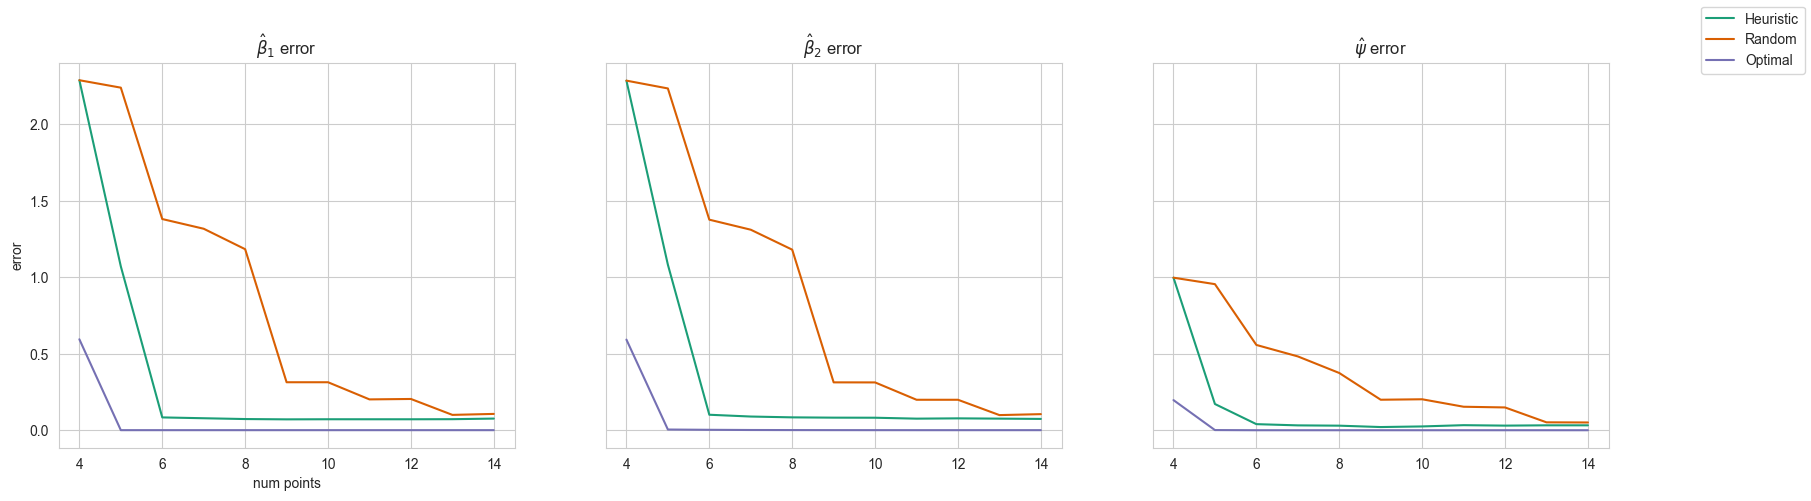

In [58]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey= True)
fig.set_figwidth(20)
fig.set_figheight(5)
axs[0].set_title('$\\hat{\\beta}_1$' ' error')
axs[0].set_ylabel('error')
axs[0].set_xlabel('num points')
axs[0].plot(range(4, num_iter + 5), mean_a1[:,0], label = "Heuristic")
axs[0].plot(range(4, num_iter + 5), mean_a2[:,0], label = "Random")
axs[0].plot(range(4, num_iter + 5), mean_a3[:,0], label = "Optimal")
axs[1].set_title('$\\hat{\\beta}_2$' ' error')
axs[1].plot(range(4, num_iter + 5), mean_a1[:,1])
axs[1].plot(range(4, num_iter + 5), mean_a2[:,1])
axs[1].plot(range(4, num_iter + 5), mean_a3[:,1])
axs[2].set_title('$\\hat{\\psi}$' ' error')
axs[2].plot(range(4, num_iter + 5), mean_a1[:,2])
axs[2].plot(range(4, num_iter + 5), mean_a2[:,2])
axs[2].plot(range(4, num_iter + 5), mean_a3[:,2])
fig.legend()